In [69]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [70]:
iris=load_iris()

In [71]:
type(iris)

sklearn.utils._bunch.Bunch

In [72]:
# Bunch is a dictionary like structure with keys and values

In [73]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [74]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [75]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [76]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['species']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [77]:
df['species']=df['species'].replace({0:iris.target_names[0],1:iris.target_names[1],2:iris.target_names[2]})

In [78]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [79]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [80]:
df.duplicated().sum()

np.int64(1)

In [81]:
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
142,5.8,2.7,5.1,1.9,virginica


In [82]:
# df.drop_duplicates(ignore_index=True,inplace=True)

In [83]:
df.duplicated().sum()

np.int64(1)

In [84]:
X=df.iloc[:,0:4]
y=df['species']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
clf=DecisionTreeClassifier(max_depth=2)

In [89]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [90]:
y_pred=clf.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9333333333333333

In [92]:
from sklearn.tree import plot_tree

In [93]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

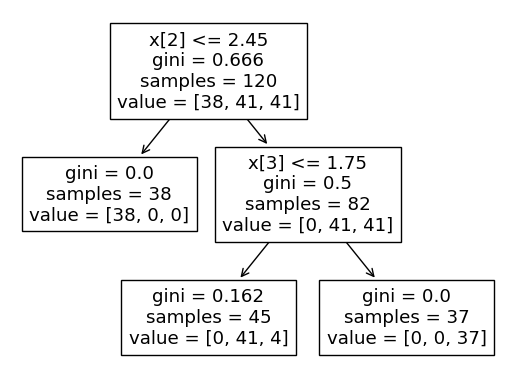

In [94]:
import matplotlib.pyplot as plt
plot_tree(clf)
plt.show()

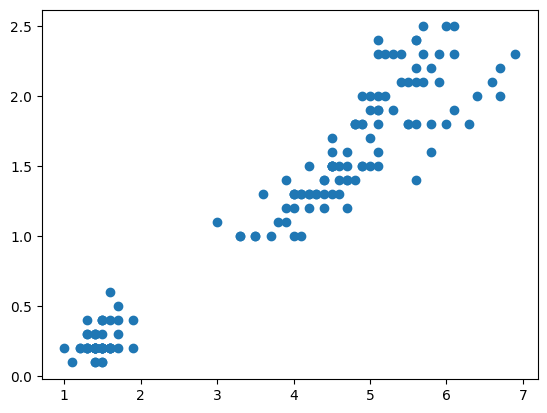

In [95]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [98]:
df_ads=pd.read_csv("Social_Network_Ads.csv")

In [99]:
df_ads

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [100]:
df_ads.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [101]:
df_ads.duplicated().sum()

np.int64(0)

In [102]:
df_ads.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [107]:
df_ads["Gender"].replace({"Male":0,"Female":1},inplace=True)

C:\Users\Ameer\AppData\Local\Temp\ipykernel_21188\2439337023.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ads["Gender"].replace({"Male":0,"Female":1},inplace=True)


In [108]:
df_ads

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [116]:
X=df_ads.iloc[:,1:4]
X

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [118]:
y=df_ads["Purchased"]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
sc=StandardScaler()

In [ ]:
# sc.fit()    #Calculate mean and standard deviation
# sc.transform()   #subtracts mean from value and divived it by sd
# sc.fit_transform()  #both the above steps

In [122]:
X=sc.fit_transform(X)

In [123]:
X

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

In [126]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [186]:
clf1=DecisionTreeClassifier(criterion='entropy', min_samples_split=20)

In [187]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=20)

In [188]:
y_pred=clf1.predict(X_test)

In [189]:
accuracy_score(y_test,y_pred)

0.8875

In [190]:
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]=120,80
plot_tree(clf1)
plt.show()

In [147]:
# GridSearchCV
param_dist={'criterion':['entropy','gini'],
            'max_depth':[1,2,3,4,5,6,7,8,None]}

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
grid=GridSearchCV(clf1,param_grid=param_dist,cv=10,n_jobs=-1)

In [161]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None]})

In [162]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [163]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [164]:
grid.best_score_

np.float64(0.896875)

In [193]:
# Ensemble Learning
# -Voting
# -Stacking
# -Bagging  : RandomForest
# -Boosting  : Adaboost, GradientBoost

In [192]:
# multiple models, which are different from one another